In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np 
dataset = pd.read_csv("data.csv")
dataset.head()
#使用pandas DataFrame的head()方法查看前5行。

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
#通过info（）方法可以快速获取数据集的简单描述。如总行数，每个属性的类型和非空值的数量。
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

# 数据处理和可视化

陈曼婷

通过对数据的简单分析我们可以发现无用列id和全空列Unnamed: 32 属于无用数据，需要进行删除。该数据集的特征值没有空缺，无需进行填充。下面我们将进行数据清洗操作。

In [3]:
#进行数据清洗
#M(恶性)= 0，B(良性)= 1
dataset['diagnosis'] = dataset['diagnosis'].replace(['M','B'],['0','1'])
#删除无用列id和全空列Unnamed: 32  
dataset=dataset.drop(['Unnamed: 32', 'id'], axis = 1)#第一次没删除的时候需要。删除之后重新运行会报错
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


绘制类别特征的频数条形图(0恶性 1良性 本数据集良性样本较多)

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

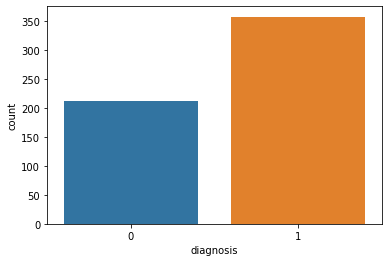

In [4]:
sns.countplot(x=dataset['diagnosis'])#0恶性 1良性 本数据集良性样本较多
#sns.countplot() 用于类别特征的频数条形图，可以画类别特征和y值（y值特征也是类比的话）的条形图

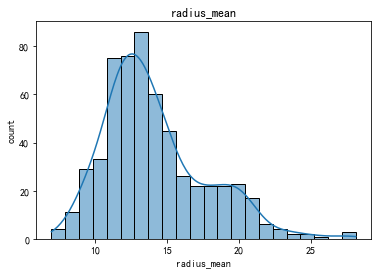

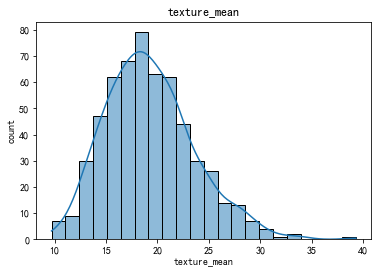

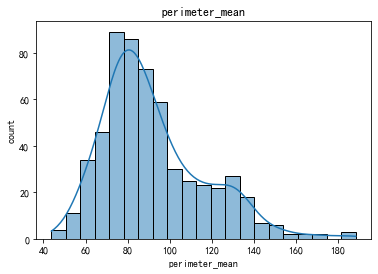

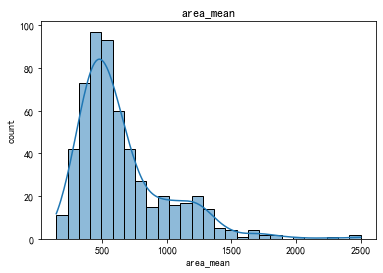

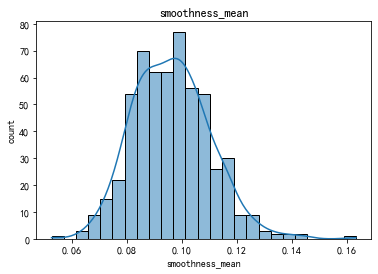

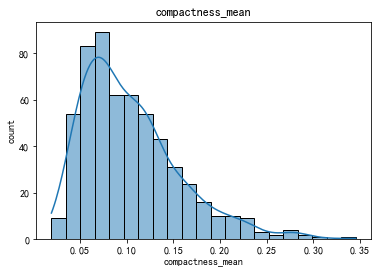

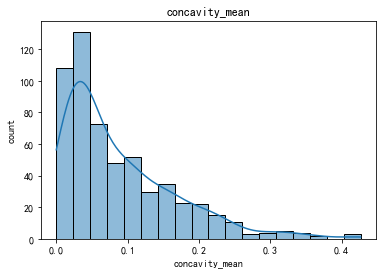

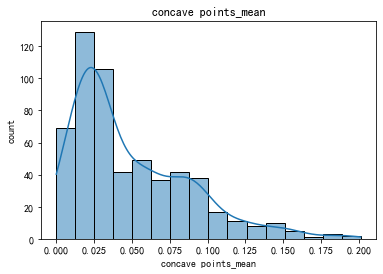

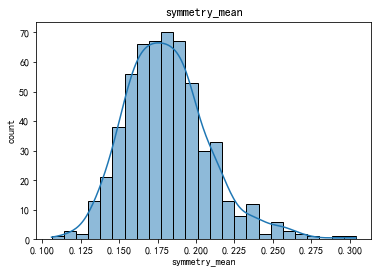

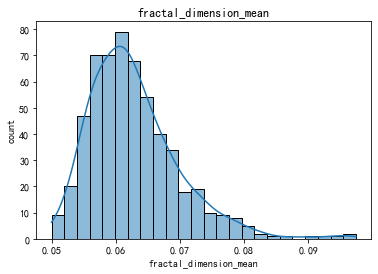

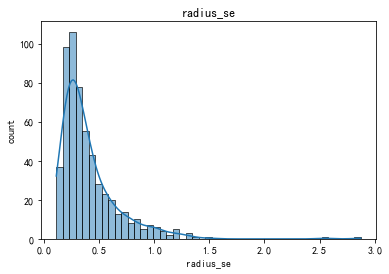

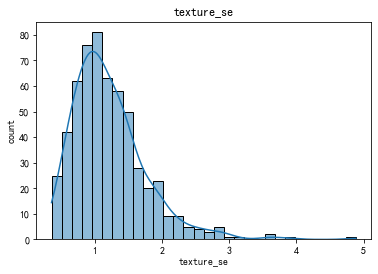

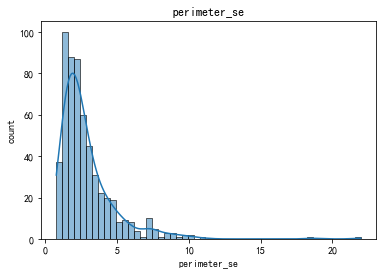

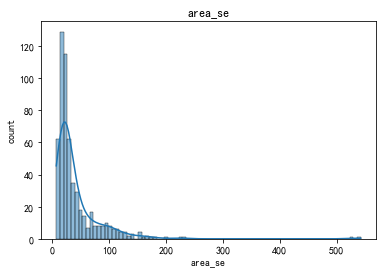

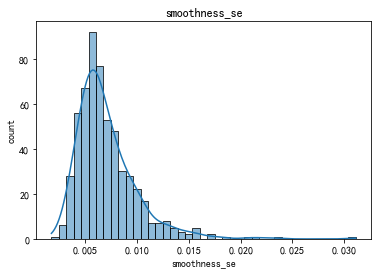

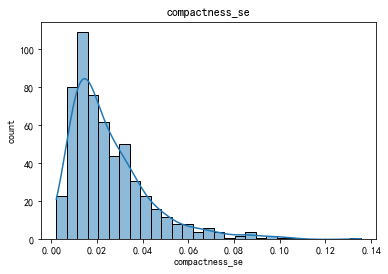

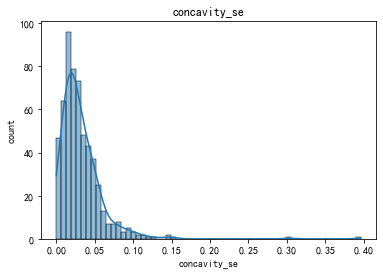

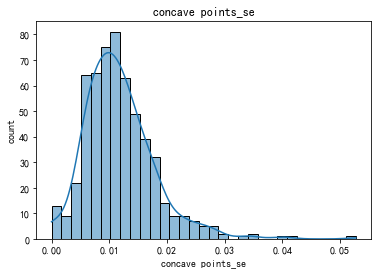

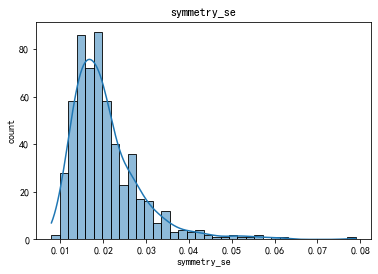

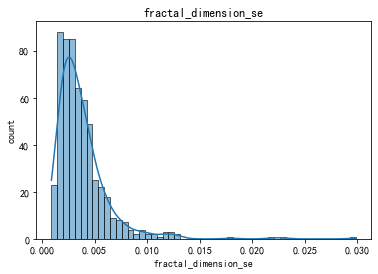

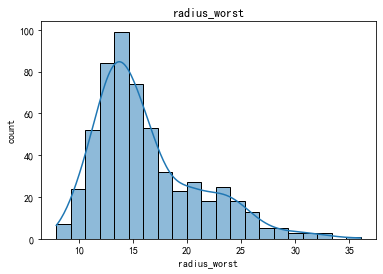

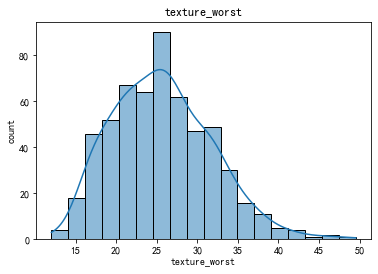

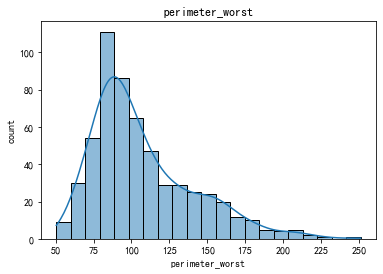

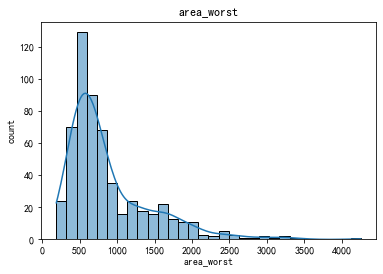

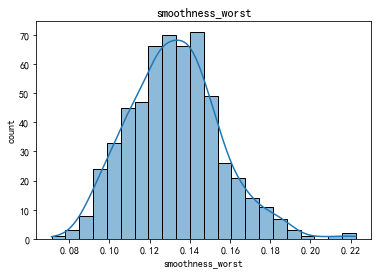

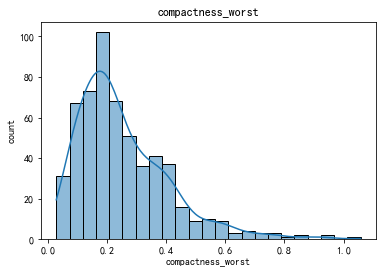

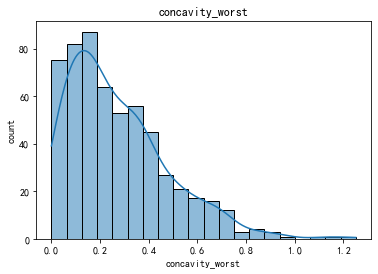

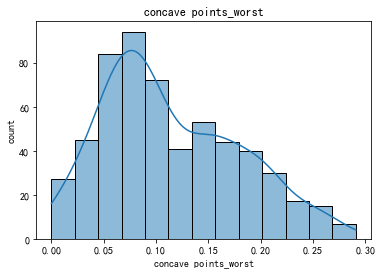

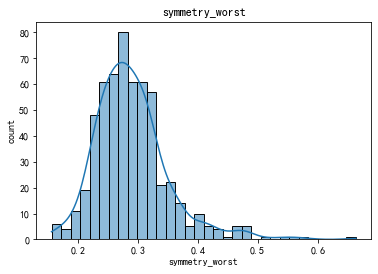

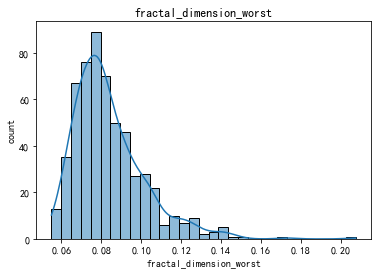

In [5]:
#绘制每个数值属性的直方图
dataset2=dataset.drop('diagnosis', axis = 1)#特征遍历需要去除标签这一列
plt.rcParams['font.family'] = 'SimHei' 
for i, feature_name in enumerate(dataset2.columns.values):
    plt.figure(figsize=(6, 4))
    sns.histplot(dataset2.iloc[:, i], kde=True)
    plt.xlabel(feature_name)
    plt.ylabel("count")
    plt.title(feature_name)
    plt.show()

.describe()方法可以得到数据集的统计信息，包括计数、均值、标准差、最小值、25%分位数、中位数、75%分位数和最大值

In [6]:
print(dataset.shape)
dataset.describe()#显示属性摘要

(569, 31)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


热力图中的颜色表示相关性的强度。颜色深，说明两者相关性强，可以剔除两者中的一个变量，从而避免过拟合。从可视化结果我们可以看出该数据集有不少特征具有较强相关性,接下来可以通过特征选择提高模型的拟合效果。

C:\Users\CMT\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\CMT\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


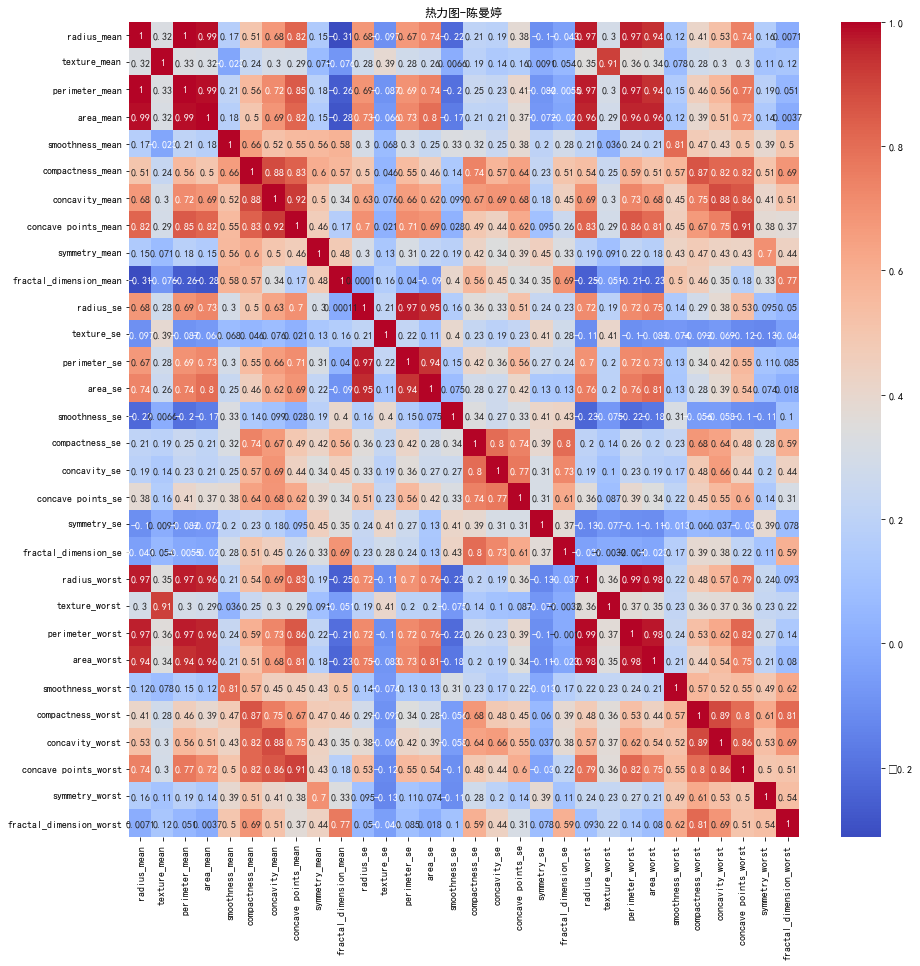

In [7]:
# 可视化相关系数热力图
plt.figure(figsize=(15, 15))
sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm")
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.title("热力图-陈曼婷")
plt.show()
#热力图中的颜色表示相关性的强度
#颜色深，说明两者相关性强，可以剔除两者中的一个变量，从而避免过拟合

# KNN

kNN是一个基本而简单的分类算法，作为监督学习，那么KNN模型需要的是有标签的训练数据，对于新样本的类别由与新样本距离最近的k个训练样本点按照分类决策规则决定。

In [8]:
#第一个模型：KNN
#接下来是sklearn库自带的特征选择效果
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
x= dataset.drop('diagnosis', axis = 1)#去除标签，其余的就是特征
y=dataset['diagnosis']#该列为标签

In [9]:
model =KNeighborsClassifier()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# 计算模型准确率
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.956140350877193


未经过特征选择的KNN模型准确率大致为0.9561，下面我们来看看经过特征选择后的模型准确率效果会不会更好。

In [10]:
#特征选择
maxi=10
maxa=0.9
#特征缩放
scaler= StandardScaler()
x=scaler.fit_transform(dataset.drop('diagnosis', axis = 1))#去除标签，其余的就是特征
for i in range(10,30):
    selector = SelectKBest(score_func=f_classif, k=i)
    selected_features = selector.fit_transform(x, y)
    X_train, X_test, y_train, y_test = train_test_split(selected_features, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    # 在测试集上进行预测
    y_pred = model.predict(X_test)
    # 计算模型准确率
    accuracy = accuracy_score(y_test, y_pred)
    print("特征选择{}个后模型准确率:{}".format(i,accuracy))
    if(accuracy>maxa):
        maxa=accuracy
        maxi=i
print(maxi,maxa)   

特征选择10个后模型准确率:0.9736842105263158
特征选择11个后模型准确率:0.9649122807017544
特征选择12个后模型准确率:0.9649122807017544
特征选择13个后模型准确率:0.9649122807017544
特征选择14个后模型准确率:0.9649122807017544
特征选择15个后模型准确率:0.9649122807017544
特征选择16个后模型准确率:0.9649122807017544
特征选择17个后模型准确率:0.9736842105263158
特征选择18个后模型准确率:0.9649122807017544
特征选择19个后模型准确率:0.9649122807017544
特征选择20个后模型准确率:0.9649122807017544
特征选择21个后模型准确率:0.9649122807017544
特征选择22个后模型准确率:0.9649122807017544
特征选择23个后模型准确率:0.9649122807017544
特征选择24个后模型准确率:0.9649122807017544
特征选择25个后模型准确率:0.9649122807017544
特征选择26个后模型准确率:0.9649122807017544
特征选择27个后模型准确率:0.9649122807017544
特征选择28个后模型准确率:0.9649122807017544
特征选择29个后模型准确率:0.9649122807017544
10 0.9736842105263158


In [11]:
selector = SelectKBest(score_func=f_classif, k=10)
selected_features = selector.fit_transform(x, y)
X_train, X_test, y_train, y_test = train_test_split(selected_features, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
# 在测试集上进行预测
y_pred = model.predict(X_test)
# 计算模型准确率
# 计算模型准确率
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
selected_feature_indices = selector.get_support()
selected_feature_names = dataset.drop('diagnosis', axis = 1).columns[selected_feature_indices]
print("选择的特征为:")
print(selected_feature_names)

0.9736842105263158
选择的特征为:
Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')


经过遍历后我们选出了效果最好的特征选择数量，此时模型准确率大致为0.9737，较之前有所上升。
下面我们将绘制该模型的ROC曲线和混淆矩阵对模型效果进行可视化。
TP：正确肯定——实际是正例，识别为正例
FN：错误否定（漏报）——实际是正例，却识别成了负例
FP：错误肯定（误报）——实际是负例，却识别成了正例
TN：正确否定——实际是负例，识别为负例
FPR = FP/(FP+TN)
TPR = TP/(TP+FN)


我们希望实际是恶性的不要被识别为良性，即负例不要被识别为正例，即FPR=0
我们希望实际是良性的不要被识别为恶性，即正例不要被识别为负例，即TPR=1
理想目标：TPR=1，FPR=0,即图中(0,1)点，故ROC曲线越靠拢(0,1)点，越偏离45度对角线越好。

In [12]:
from sklearn import metrics, model_selection, preprocessing
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np
f1_score = metrics.f1_score(y_test, model.predict(X_test),pos_label='1')#,pos_label='1'
print('f1_score:{}'.format(f1_score))
predict_probs = model.predict_proba(X_test)
y_score = predict_probs[:,1]
fpr,tpr,thresholds = metrics.roc_curve(y_test, y_score, pos_label='1')
roc_auc = metrics.auc(fpr,tpr)  # 计算auc的值

f1_score:0.9787234042553192


F1得分可以解释为精确率和召回率的调和平均值，有更好的评估效果。F1得分较高，说明在检测方面具有较好的效果。

In [13]:
#查看精确率、召回率、F1-score
from sklearn.metrics import classification_report
print(classification_report(y_test,model.predict(X_test),target_names=["恶性","良性"]))

              precision    recall  f1-score   support

          恶性       0.95      0.98      0.97        43
          良性       0.99      0.97      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



<Figure size 432x288 with 0 Axes>

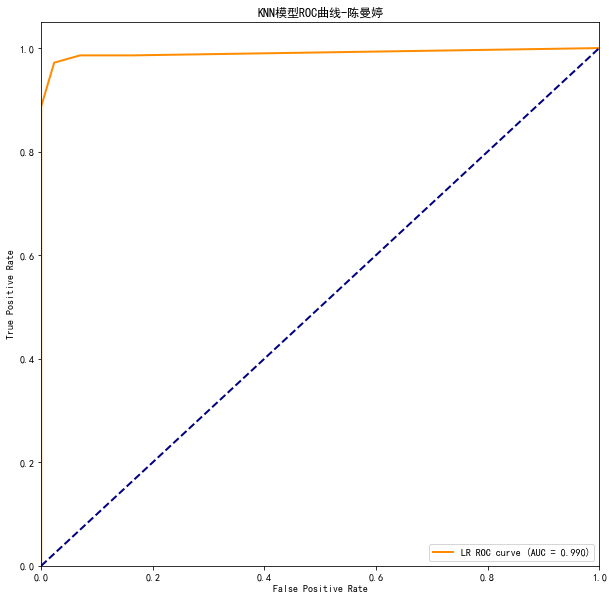

In [14]:
# 绘制roc曲线
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',lw=lw,label='LR ROC curve (AUC = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.rcParams['font.family']='SimHei'#加上这个可以显示中文
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN模型ROC曲线-陈曼婷')
plt.legend(loc="lower right")
plt.show()
#理想目标：TPR=1，FPR=0,即图中(0,1)点，故ROC曲线越靠拢(0,1)点，越偏离45度对角线越好，Sensitivity、Specificity越大效果越好。

混淆矩阵是分析误分类的一个重要指标。对角线表示已正确分类的类。

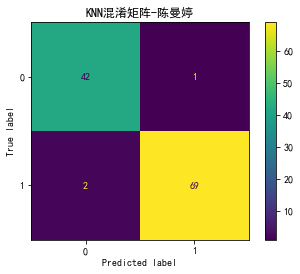

In [15]:
#该分类应用于该数据集的的测试集时的混淆矩阵    
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
plot_confusion_matrix(model, X_test, y_test)  
plt.title("KNN混淆矩阵-陈曼婷")
plt.show()    

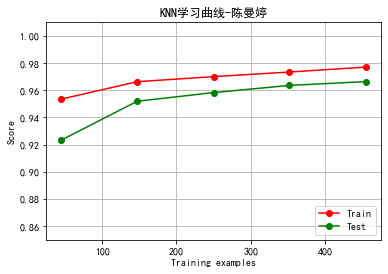

In [16]:
#导入样本数据
import numpy as np
#导入伯努利贝叶斯
from sklearn.naive_bayes import BernoulliNB
#导入数据集生成工具和拆分工具
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
#导入学习曲线库
from sklearn.model_selection import learning_curve
#导入随机拆分工具
from sklearn.model_selection import ShuffleSplit
#定义一个学习曲线函数
def plot_learning_curve(est, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    #设置横纵标签
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        est, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.grid()
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label = "Train")
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label = "Test")
    plt.legend(loc="lower right")
    #plt.legend(["Train", "Test"])
    return plt

title = "KNN学习曲线-陈曼婷"
#设定拆分数量
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
plot_learning_curve(model, title, x, y, ylim=(0.85, 1.01), cv=cv, n_jobs=4)
plt.show()

# 逻辑回归 

In [17]:
#第二个模型：逻辑回归
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
x=dataset.drop('diagnosis', axis = 1)#去除标签，其余的就是特征
y=dataset['diagnosis']#该列为标签
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# 创建逻辑回归模型并设置迭代次数
model2 = LogisticRegression(max_iter=1000)
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
# 计算模型准确率
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.956140350877193


初始逻辑回归模型的准确率大致为0.9561，经过特征缩放和特征选择后应该会继续上升，让我们开始实践：注意这里的训练集和测试集应该在
处理后的数据集上进行划分。

In [18]:
#特征缩放
scaler= StandardScaler()
x=scaler.fit_transform(dataset.drop('diagnosis', axis = 1))#去除标签，其余的就是特征
#特征选择
maxi=10
maxa=0.9
for i in range(5,25):
    selector = SelectKBest(score_func=f_classif, k=i)
    selected_features2 = selector.fit_transform(x, y)
    X_train, X_test, y_train, y_test = train_test_split(selected_features2, y, test_size=0.2, random_state=42)
    model2.fit(X_train, y_train)
    # 在测试集上进行预测
    y_pred = model2.predict(X_test)
    # 计算模型准确率
    accuracy = accuracy_score(y_test, y_pred)
    print("特征选择{}个后模型准确率:{}".format(i,accuracy))
    if(accuracy>maxa):
        maxa=accuracy
        maxi=i
print(maxi,maxa)   

特征选择5个后模型准确率:0.9736842105263158
特征选择6个后模型准确率:0.9736842105263158
特征选择7个后模型准确率:0.9736842105263158
特征选择8个后模型准确率:0.9736842105263158
特征选择9个后模型准确率:0.9736842105263158
特征选择10个后模型准确率:0.9736842105263158
特征选择11个后模型准确率:0.956140350877193
特征选择12个后模型准确率:0.956140350877193
特征选择13个后模型准确率:0.9649122807017544
特征选择14个后模型准确率:0.9649122807017544
特征选择15个后模型准确率:0.9649122807017544
特征选择16个后模型准确率:0.9736842105263158
特征选择17个后模型准确率:0.9736842105263158
特征选择18个后模型准确率:0.9824561403508771
特征选择19个后模型准确率:0.9824561403508771
特征选择20个后模型准确率:0.9824561403508771
特征选择21个后模型准确率:0.9824561403508771
特征选择22个后模型准确率:0.9824561403508771
特征选择23个后模型准确率:0.9824561403508771
特征选择24个后模型准确率:0.9736842105263158
18 0.9824561403508771


In [19]:
selector = SelectKBest(score_func=f_classif, k=maxi)
selected_features2 = selector.fit_transform(x, y)
X_train, X_test, y_train, y_test = train_test_split(selected_features2, y, test_size=0.2, random_state=42)
model2.fit(X_train, y_train)
# 在测试集上进行预测
y_pred = model2.predict(X_test)
# 计算模型准确率
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
selected_feature_indices = selector.get_support()
selected_feature_names = dataset.drop('diagnosis', axis = 1).columns[selected_feature_indices]
print("选择的特征为:")
print(selected_feature_names)

0.9824561403508771
选择的特征为:
Index(['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se',
       'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst'],
      dtype='object')


经过遍历后我们选出了效果最好的特征选择数量，此时模型准确率大致为0.9825，较之前有所上升。

In [20]:
f1_score2 = metrics.f1_score(y_test, model2.predict(X_test),pos_label='1')#,pos_label='1'
print('f1_score:{}'.format(f1_score2))
predict_probs = model2.predict_proba(X_test)
y_score2 = predict_probs[:,1]
fpr2,tpr2,thresholds2 = metrics.roc_curve(y_test, y_score2, pos_label='1')
roc_auc2 = metrics.auc(fpr2,tpr2)  # 计算auc的值

f1_score:0.9861111111111112


In [21]:
print(classification_report(y_test,model2.predict(X_test),target_names=["恶性","良性"]))

              precision    recall  f1-score   support

          恶性       1.00      0.95      0.98        43
          良性       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



<Figure size 432x288 with 0 Axes>

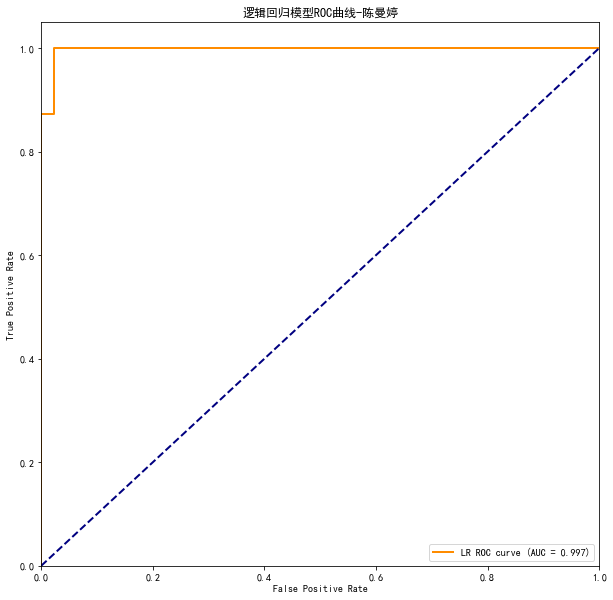

In [22]:
# 绘制roc曲线
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr2, tpr2, color='darkorange',lw=lw,label='LR ROC curve (AUC = %0.3f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.rcParams['font.family']='SimHei'#加上这个可以显示中文
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('逻辑回归模型ROC曲线-陈曼婷')
plt.legend(loc="lower right")
plt.show()
#理想目标：TPR=1，FPR=0,即图中(0,1)点，故ROC曲线越靠拢(0,1)点，越偏离45度对角线越好，Sensitivity、Specificity越大效果越好。

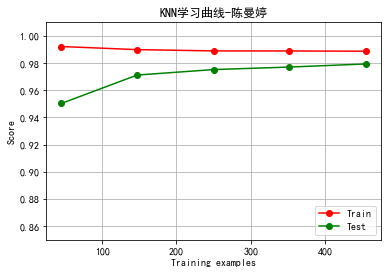

In [23]:
plot_learning_curve(model2, title,x, y, ylim=(0.85, 1.01), cv=cv, n_jobs=4)
title = "LR学习曲线-陈曼婷"
plt.show()

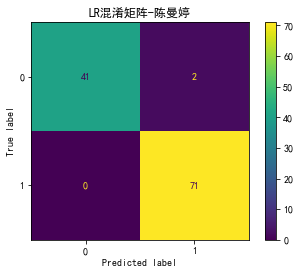

In [24]:
plot_confusion_matrix(model2, X_test, y_test) 
plt.title("LR混淆矩阵-陈曼婷")
plt.show()  

两种模型的ROC曲线对比：
AUC被定义为ROC曲线下的面积，取值范围一般在0.5和1之间。使用AUC值作为评价标准是因为很多时候ROC曲线并不能清晰的说明哪个分类器的效果更好，而作为一个数值，对应AUC更大的分类器效果更好。AUC值越大，模型的分类效果越好，疾病检测越准确。

<Figure size 432x288 with 0 Axes>

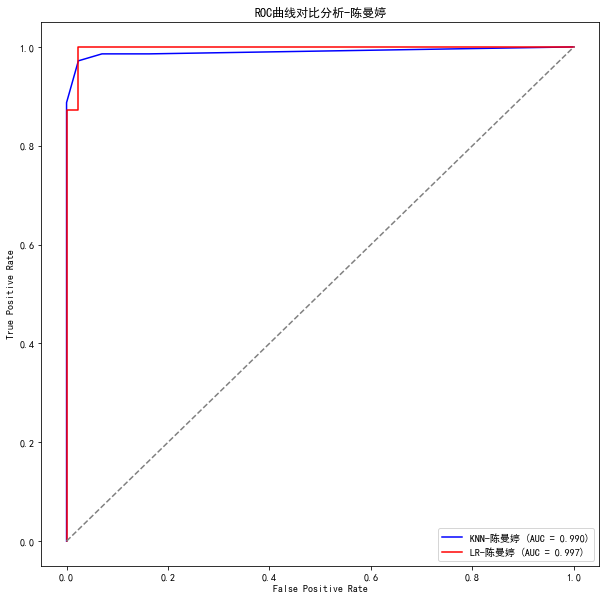

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# 绘制ROC曲线
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='b', label='KNN-陈曼婷 (AUC = %0.3f)' % roc_auc)
plt.plot(fpr2, tpr2, color='r', label='LR-陈曼婷 (AUC = %0.3f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC曲线对比分析-陈曼婷')
plt.legend(loc="lower right")
plt.show()

从对比图上我们可以分析得到，逻辑回归模型的效果和KNN相比较好。LR模型更接近(0,1)点，同时AUC的值也更大。